## Arm Reaching (RM Session 1)

In [76]:
import os
import numpy as np
import mne
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
# from google.colab import drive
# drive.mount('/content/drive')
from scipy.io import loadmat
from scipy.signal import butter, lfilter
warnings.filterwarnings('ignore')

### read paths of all .mat files in a list

In [77]:
folder_path=r'D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM'
folder_files=os.listdir(folder_path)
for i in folder_files:
    print(i)

EEG_session1_sub10_reaching_realMove.mat
EEG_session1_sub11_reaching_realMove.mat
EEG_session1_sub12_reaching_realMove.mat
EEG_session1_sub13_reaching_realMove.mat
EEG_session1_sub14_reaching_realMove.mat
EEG_session1_sub15_reaching_realMove.mat
EEG_session1_sub16_reaching_realMove.mat
EEG_session1_sub17_reaching_realMove.mat
EEG_session1_sub18_reaching_realMove.mat
EEG_session1_sub19_reaching_realMove.mat
EEG_session1_sub1_reaching_realMove.mat
EEG_session1_sub20_reaching_realMove.mat
EEG_session1_sub21_reaching_realMove.mat
EEG_session1_sub22_reaching_realMove.mat
EEG_session1_sub23_reaching_realMove.mat
EEG_session1_sub24_reaching_realMove.mat
EEG_session1_sub25_reaching_realMove.mat
EEG_session1_sub2_reaching_realMove.mat
EEG_session1_sub3_reaching_realMove.mat
EEG_session1_sub4_reaching_realMove.mat
EEG_session1_sub5_reaching_realMove.mat
EEG_session1_sub6_reaching_realMove.mat
EEG_session1_sub7_reaching_realMove.mat
EEG_session1_sub8_reaching_realMove.mat
EEG_session1_sub9_reachi

In [78]:
matfiles=[]
for i in folder_files:
    file=folder_path+'\\'+i
    matfiles.append(file) 
for i in matfiles:
    print(i)

D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub10_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub11_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub12_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub13_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub14_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub15_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub16_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub17_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub18_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-rea

### explore all keys for a file

In [79]:
temp = loadmat(matfiles[0])
temp.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'mnt', 'nfo', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch30', 'ch31', 'ch32', 'ch33', 'ch34', 'ch35', 'ch36', 'ch37', 'ch38', 'ch39', 'ch40', 'ch41', 'ch42', 'ch43', 'ch44', 'ch45', 'ch46', 'ch47', 'ch48', 'ch49', 'ch50', 'ch51', 'ch52', 'ch53', 'ch54', 'ch55', 'ch56', 'ch57', 'ch58', 'ch59', 'ch60', 'dat'])

In [80]:
col=1
for i in temp['nfo'][0][0][0][0]:
    print('ch'+str(col),' : ',i[0],end = '\n')
    col+=1

ch1  :  Fp1
ch2  :  AF7
ch3  :  AF3
ch4  :  AFz
ch5  :  F7
ch6  :  F5
ch7  :  F3
ch8  :  F1
ch9  :  Fz
ch10  :  FT7
ch11  :  FC5
ch12  :  FC3
ch13  :  FC1
ch14  :  T7
ch15  :  C5
ch16  :  C3
ch17  :  C1
ch18  :  Cz
ch19  :  TP7
ch20  :  CP5
ch21  :  CP3
ch22  :  CP1
ch23  :  CPz
ch24  :  P7
ch25  :  P5
ch26  :  P3
ch27  :  P1
ch28  :  Pz
ch29  :  PO7
ch30  :  PO3
ch31  :  POz
ch32  :  Fp2
ch33  :  AF4
ch34  :  AF8
ch35  :  F2
ch36  :  F4
ch37  :  F6
ch38  :  F8
ch39  :  FC2
ch40  :  FC4
ch41  :  FC6
ch42  :  FT8
ch43  :  C2
ch44  :  C4
ch45  :  C6
ch46  :  T8
ch47  :  CP2
ch48  :  CP4
ch49  :  CP6
ch50  :  TP8
ch51  :  P2
ch52  :  P4
ch53  :  P6
ch54  :  P8
ch55  :  PO4
ch56  :  PO8
ch57  :  O1
ch58  :  Oz
ch59  :  O2
ch60  :  Iz


### to_data_frame() :
- prepare a file in data frame
- map the labels correctly for their trials
- drop unnecessary channels
- take selected count of trials

In [139]:
def to_data_frame(matfile,selected_channels,number_of_trials):

    #load the mat file
    data = loadmat(matfile)

    #new data frame to extract the target data
    df=pd.DataFrame()

    #the scientific name for the selected electrodes
    selected_electrodes=[]
    for i in selected_channels:
        selected_electrodes.append('ch'+str(i)+'_'+data['nfo'][0][0][0][0][i-1][0])

    #select target channels in the data frame   
    index=0
    for i in selected_electrodes:
        added_channel = pd.DataFrame(data['ch'+str(selected_channels[index])],columns =[i])
        df = pd.concat([df,added_channel],axis=1)
        index+=1

    #add labels col & initialize withe none
    labels = np.empty(data['nfo'][0][0][2][0][0])  # data['nfo'][0][0][2][0][0] --> return number of frames (rows)
    labels.fill(np.nan) 
    trials =np.empty(data['nfo'][0][0][2][0][0])
    trials.fill(np.nan)

    #dictionary for mapping triger events to numbers from 0 to 6 in the same order 
    label_decode ={11:0 , 21:1 , 31:2 , 41:3 , 51:4 , 61:5 , 8:6}

    #labels extraction
    start_point_info = data['mrk'][0][0][5][0][0][0][0][0] 
    end_point_info = data['mrk'][0][0][5][0][0][0][0][1]
    trigger_marking_time = data['mrk'][0][0][0][0]
    trigger_number = data['mrk'][0][0][1][0]
    last_trial ={0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0}

    
    for i in range (0,data['nfo'][0][0][8][0][0]): # data['nfo'][0][0][8][0][0] --> 600 (300 trial + 300 rest period)

        start,end=0,0
        label=label_decode[trigger_number[i]]

        if last_trial[label]==number_of_trials:
            continue

        if i==0:
            start=start_point_info
            end=trigger_marking_time[i]
        elif i==599:
            start=trigger_marking_time[i]
            end=end_point_info
        else:
            start=trigger_marking_time[i-1]
            end=trigger_marking_time[i]
        
        if end-start<18000: # each file has one outlier trial
            last_trial[label]+=1
            if label!=6: # if label refers to one movement, then take only the 4s of the execution of trial and ignore the 3s of visual cue
                for j in range (start+7500,end):
                    labels[j]=label
                    trials[j]=last_trial[label]
            else:
                for j in range (start,end):
                    labels[j]=label
                    trials[j]=last_trial[label]  

       
    df=df.assign(Label=labels)
    df=df.assign(Trial=trials)

    #drop rest of rows which didn't assigned to label
    df.dropna(how='any',inplace=True)
     
    return df
    

In [140]:
glob_test=pd.DataFrame()
glob_train=pd.DataFrame()
selected_channels=[2,3,4,6,7,8,9,11,12,13,14,15,16,17,18]
events ={0:'Forward' , 1:'Backward' , 2:'Left' , 3:'Right' , 4:'Up' , 5:'Down' , 6:'Rest'}
number_of_trials=50  #selected number of trials for each class

In [141]:
df=to_data_frame(matfiles[0],selected_channels,number_of_trials)

In [142]:
df

ch2_AF7  ch3_AF3  ch4_AFz  ch6_F5  ch7_F3  ch8_F1  ch9_Fz  ch11_FC5  \
49343      -3637    -2098    -1451   -2386   -9669  -14526    1155     -1698   
49344      -3659    -2110    -1453   -2403   -9669  -14520    1147     -1709   
49345      -3681    -2121    -1455   -2419   -9671  -14508    1141     -1718   
49346      -3704    -2135    -1458   -2436   -9675  -14500    1137     -1727   
49347      -3729    -2151    -1462   -2457   -9681  -14494    1128     -1737   
...          ...      ...      ...     ...     ...     ...     ...       ...   
8626753     -745     4684      225    6471    4215    1521   10937      2191   
8626754     -746     4687      227    6457    4204    1491   10927      2172   
8626755     -745     4691      228    6445    4194    1460   10916      2153   
8626756     -743     4700      230    6436    4187    1431   10910      2137   
8626757     -739     4708      233    6427    4184    1409   10905      2122   

         ch12_FC3  ch13_FC1  ch14_T7  ch15_C5  ch16_C3  ch17_C1  ch18_Cz  \
49343       -1612      4635     -227    -2860    -8714   -29149   -10614   
49344       -1583      4627     -227    -2847    -8687   -29115   -10587   
49345       -1552      4624     -227    -2833    -8658   -29078   -10552   
49346       -1524      4623     -228    -2819    -8629   -29039   -10516   
49347       -1499      4617     -230    -2807    -8603   -29001   -10481   
...           ...       ...      ...      ...      ...      ...      ...   
8626753      3245      2116     1008     5680     9155     2443    14549   
8626754      3223      2093      996     5663     9126     2406    14542   
8626755      3197      2060      985     5647     9095     2362    14534   
8626756      3180      2034      975     5634     9068     2324    14530   
8626757      3161      2012      968     5621     9042     2291    14530   

         Label  Trial  
49343      2.0    1.0  
49344      2.0    1.0  
49345      2.0    1.0  
49346      2.0    1.0  
49347      2.0    1.0  
...        ...    ...  
8626753    2.0   50.0  
8626754    2.0   50.0  
8626755    2.0   50.0  
8626756    2.0   50.0  
8626757    2.0   50.0  

[3517293 rows x 17 columns]

In [143]:
df['Label'].value_counts()

1.0    504266
2.0    504244
0.0    504237
3.0    504211
4.0    504167
6.0    501964
5.0    494204
Name: Label, dtype: int64

### normalize the data between 0 and 1

In [144]:
features=df.columns[0:15]
features

Index(['ch2_AF7', 'ch3_AF3', 'ch4_AFz', 'ch6_F5', 'ch7_F3', 'ch8_F1', 'ch9_Fz',
       'ch11_FC5', 'ch12_FC3', 'ch13_FC1', 'ch14_T7', 'ch15_C5', 'ch16_C3',
       'ch17_C1', 'ch18_Cz'],
      dtype='object')

Text(0.5, 1.0, 'data before normalization')

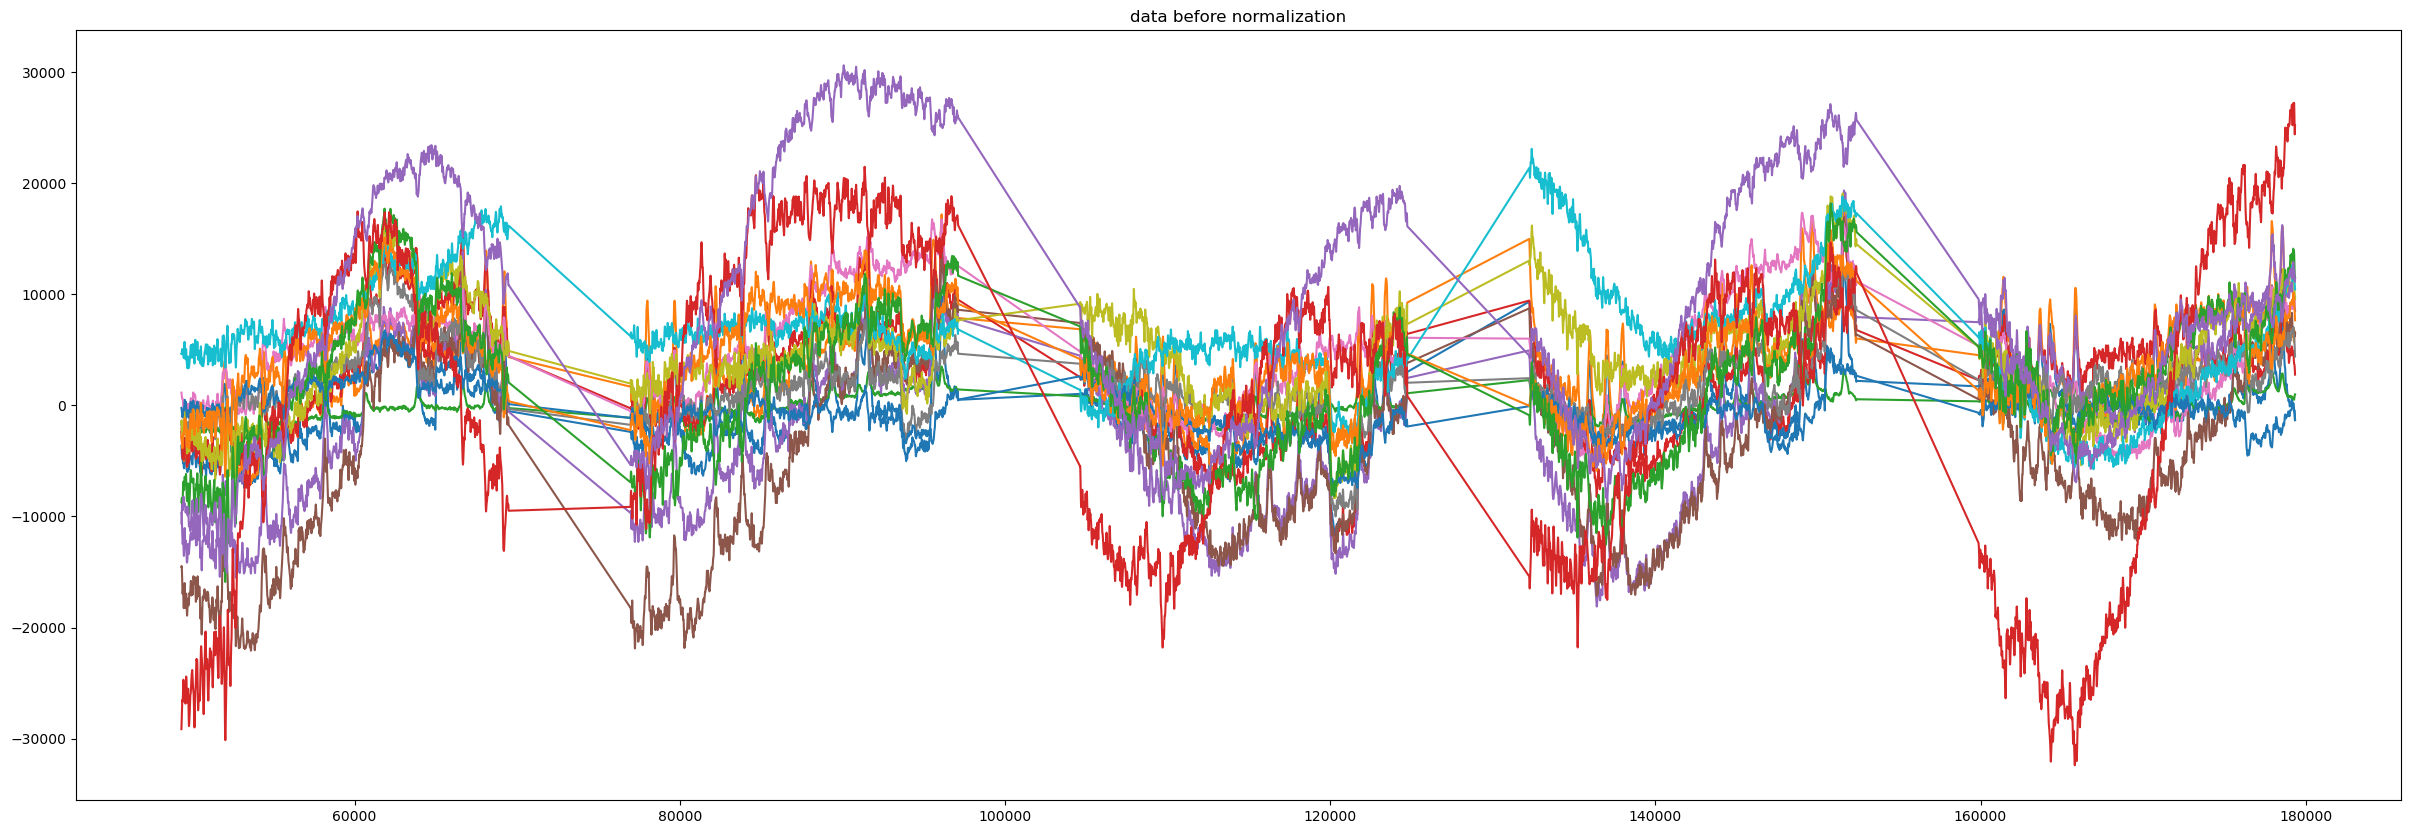

In [145]:
plt.plot(df.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("data before normalization")

In [146]:
scaler = MinMaxScaler(feature_range=(0,1))
df[features] = scaler.fit_transform(df[features])

In [147]:
df

ch2_AF7   ch3_AF3   ch4_AFz    ch6_F5    ch7_F3    ch8_F1    ch9_Fz  \
49343    0.279234  0.235248  0.272528  0.349031  0.309682  0.244297  0.349989   
49344    0.278656  0.234947  0.272328  0.348716  0.309682  0.244405  0.349824   
49345    0.278078  0.234670  0.272129  0.348419  0.309648  0.244622  0.349701   
49346    0.277474  0.234318  0.271829  0.348105  0.309580  0.244766  0.349619   
49347    0.276818  0.233916  0.271430  0.347716  0.309478  0.244875  0.349434   
...           ...       ...       ...       ...       ...       ...       ...   
8626753  0.355195  0.405757  0.439776  0.513046  0.545809  0.534147  0.551128   
8626754  0.355169  0.405833  0.439976  0.512787  0.545622  0.533605  0.550922   
8626755  0.355195  0.405933  0.440076  0.512565  0.545451  0.533046  0.550696   
8626756  0.355248  0.406160  0.440275  0.512398  0.545332  0.532522  0.550573   
8626757  0.355353  0.406361  0.440575  0.512231  0.545281  0.532124  0.550470   

         ch11_FC5  ch12_FC3  ch13_FC1   ch14_T7   ch15_C5   ch16_C3   ch17_C1  \
49343    0.401213  0.333248  0.428548  0.526486  0.466362  0.239896  0.049887   
49344    0.400902  0.333818  0.428386  0.526486  0.466648  0.240487  0.050409   
49345    0.400646  0.334428  0.428325  0.526486  0.466955  0.241122  0.050977   
49346    0.400391  0.334978  0.428304  0.526448  0.467263  0.241757  0.051575   
49347    0.400108  0.335469  0.428183  0.526371  0.467526  0.242326  0.052158   
...           ...       ...       ...       ...       ...       ...       ...   
8626753  0.511468  0.428717  0.377379  0.574100  0.653997  0.631125  0.534672   
8626754  0.510929  0.428285  0.376912  0.573637  0.653623  0.630490  0.534105   
8626755  0.510390  0.427774  0.376242  0.573213  0.653272  0.629811  0.533429   
8626756  0.509937  0.427440  0.375714  0.572828  0.652986  0.629220  0.532846   
8626757  0.509512  0.427066  0.375267  0.572558  0.652700  0.628651  0.532340   

          ch18_Cz  Label  Trial  
49343    0.092448    2.0    1.0  
49344    0.093013    2.0    1.0  
49345    0.093745    2.0    1.0  
49346    0.094498    2.0    1.0  
49347    0.095230    2.0    1.0  
...           ...    ...    ...  
8626753  0.618870    2.0   50.0  
8626754  0.618724    2.0   50.0  
8626755  0.618556    2.0   50.0  
8626756  0.618473    2.0   50.0  
8626757  0.618473    2.0   50.0  

[3517293 rows x 17 columns]

Text(0.5, 1.0, 'data after normalization')

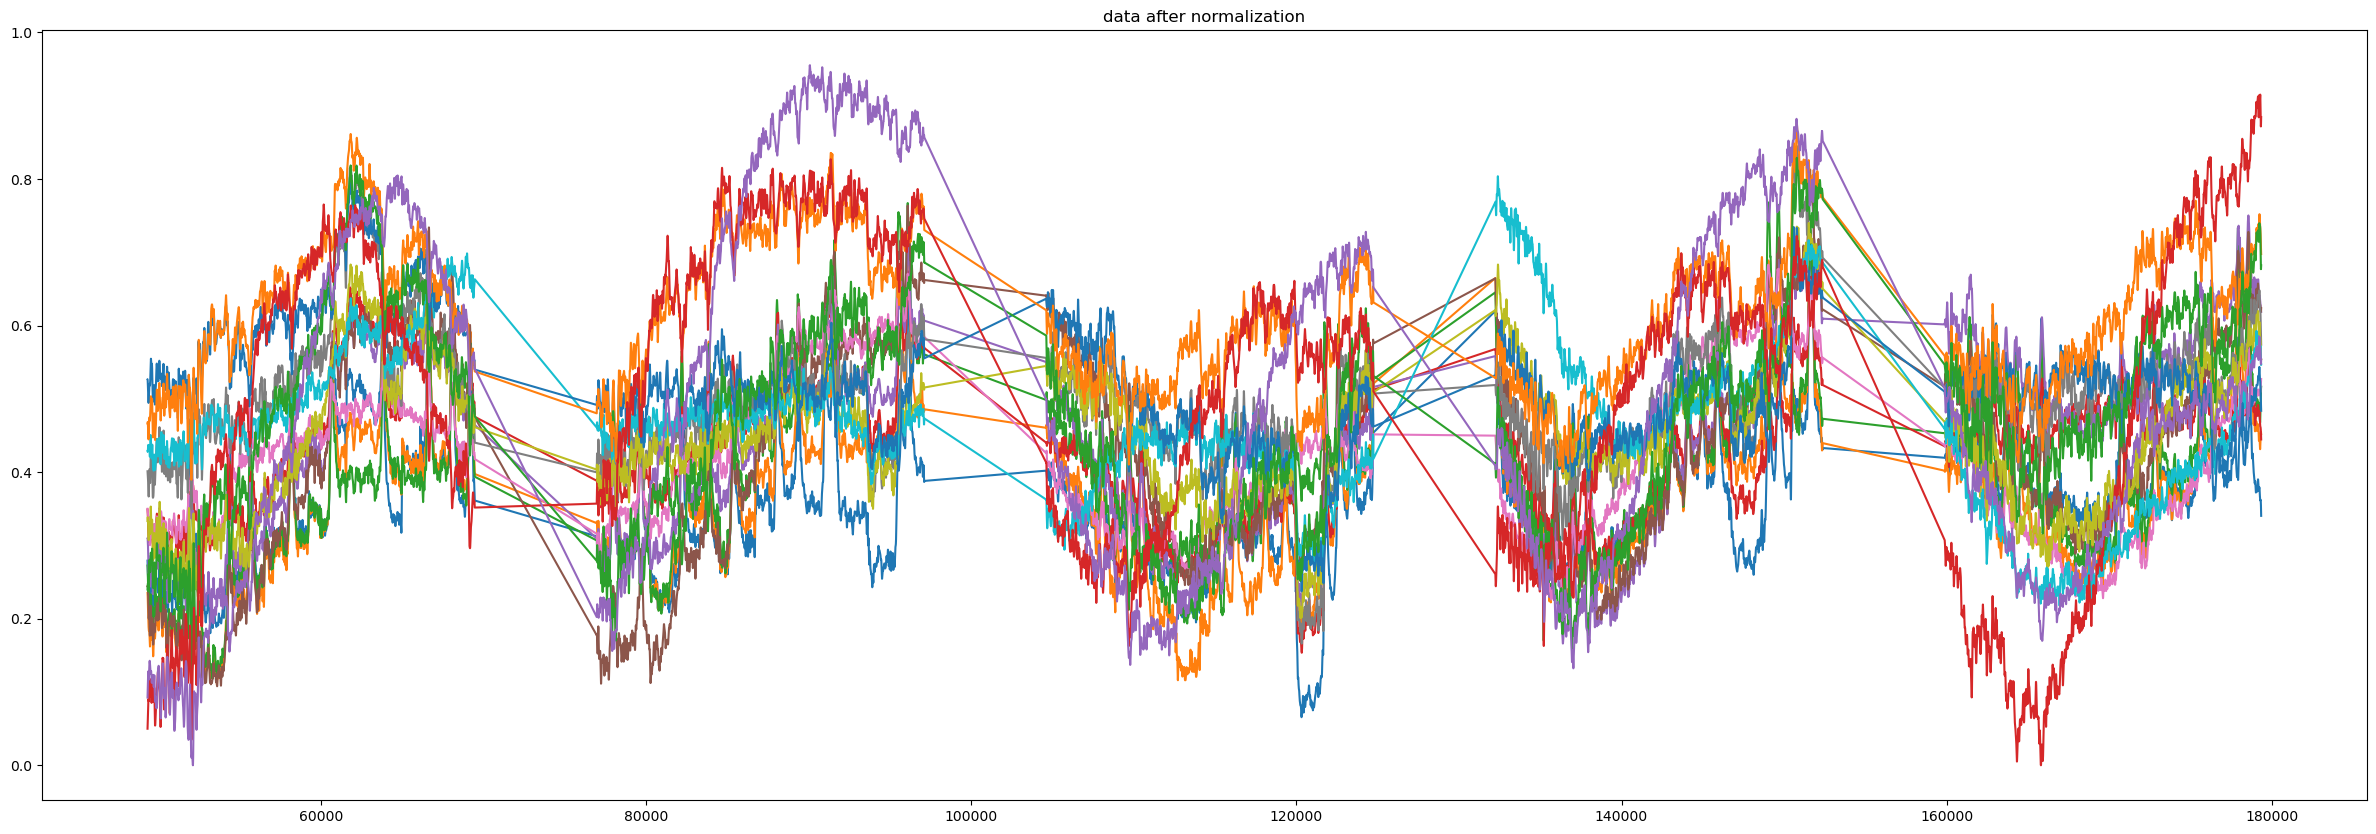

In [148]:
plt.plot(df.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("data after normalization")

### apply bandpass filter 

In [149]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

Text(0.5, 1.0, 'data before filter')

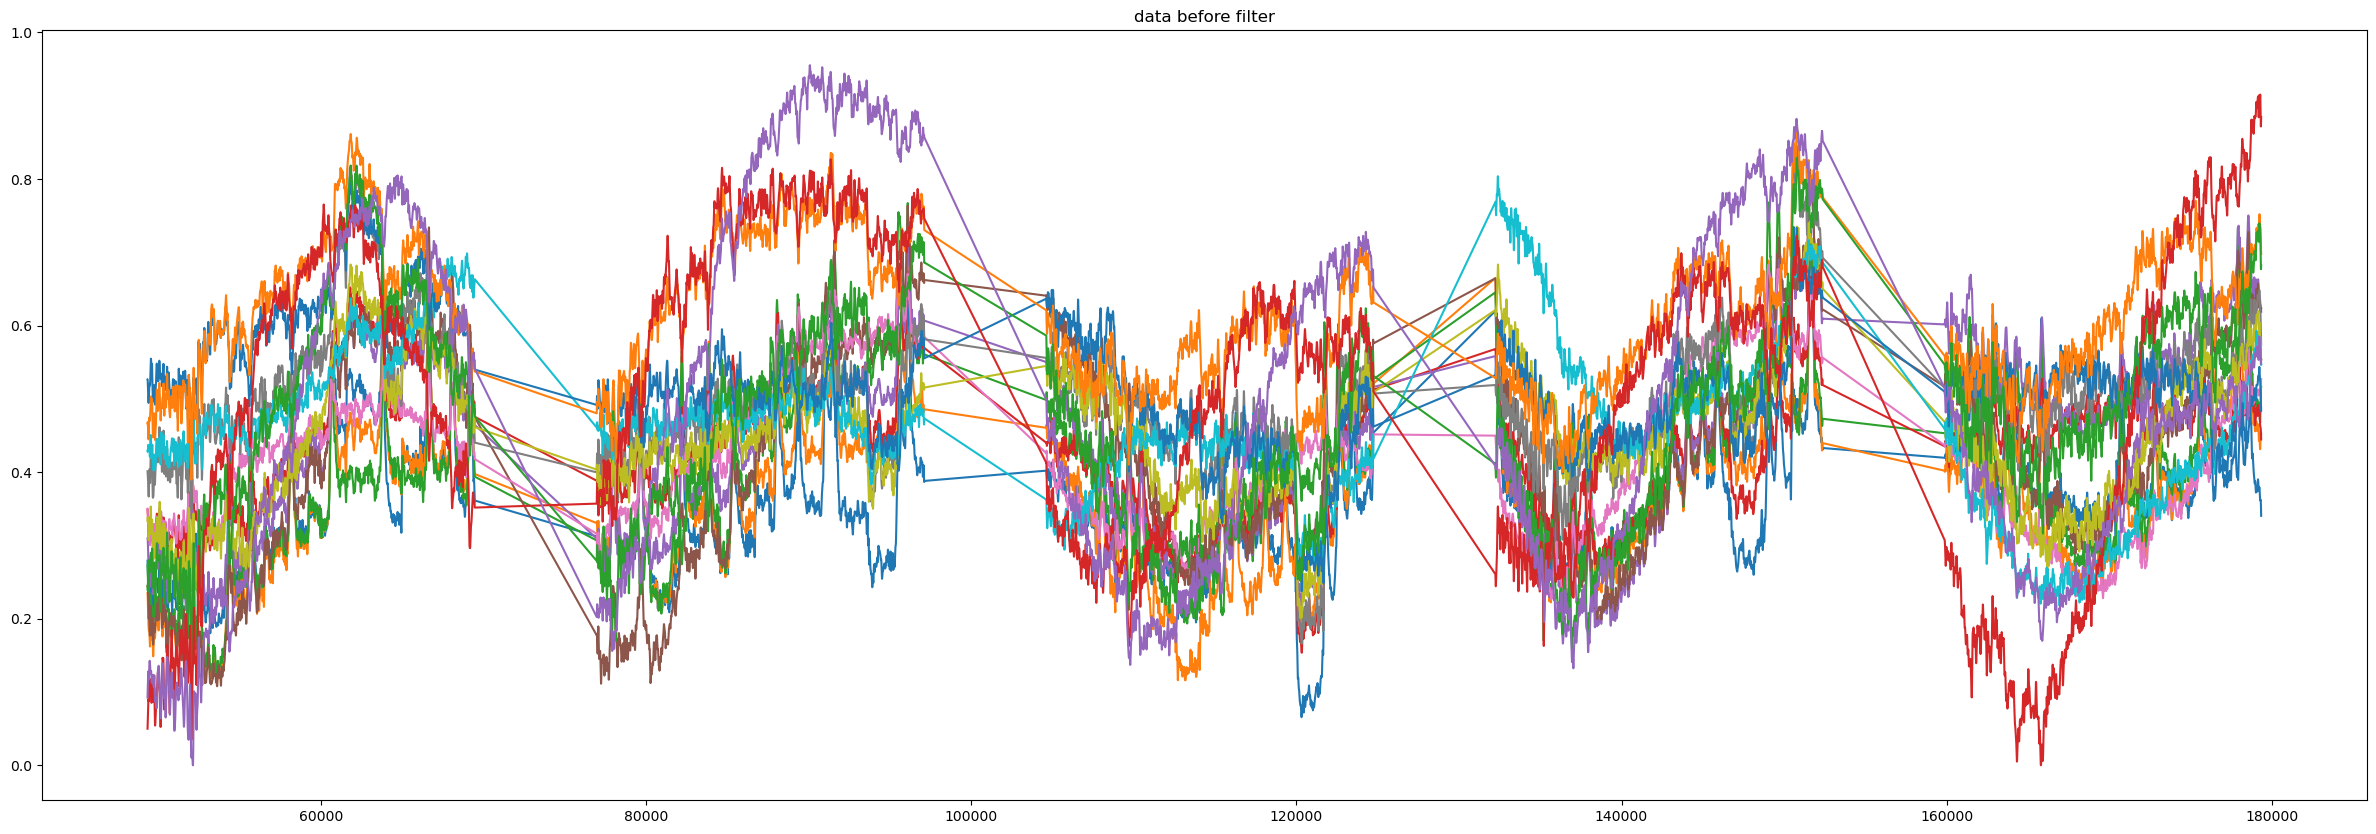

In [150]:
plt.plot(df.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("data before filter")

In [151]:
df.iloc[:,0:15] = butter_bandpass_filter(df.iloc[:,0:15].to_numpy() ,8,30,2500) # keep only alpha & beta brain waves

Text(0.5, 1.0, 'data after filter')

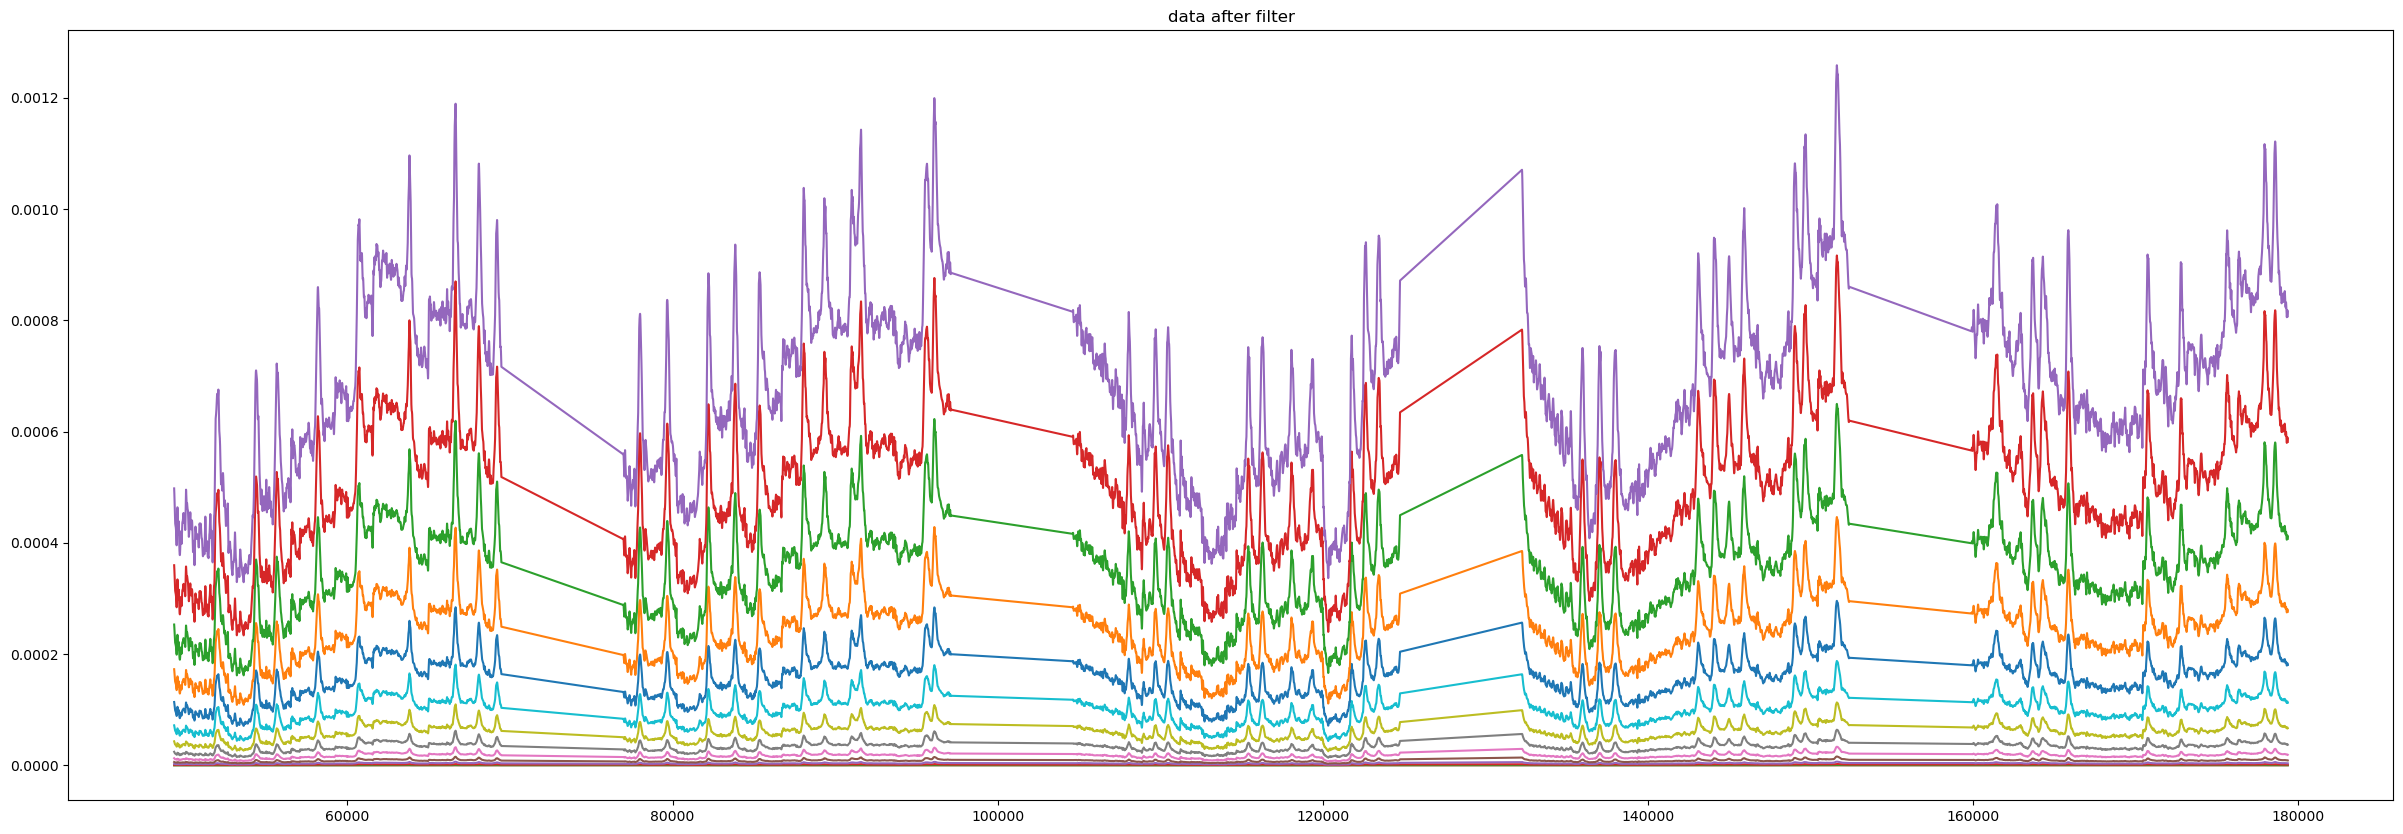

In [152]:
plt.plot(df.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("data after filter")

Text(0.5, 1.0, 'Rest')

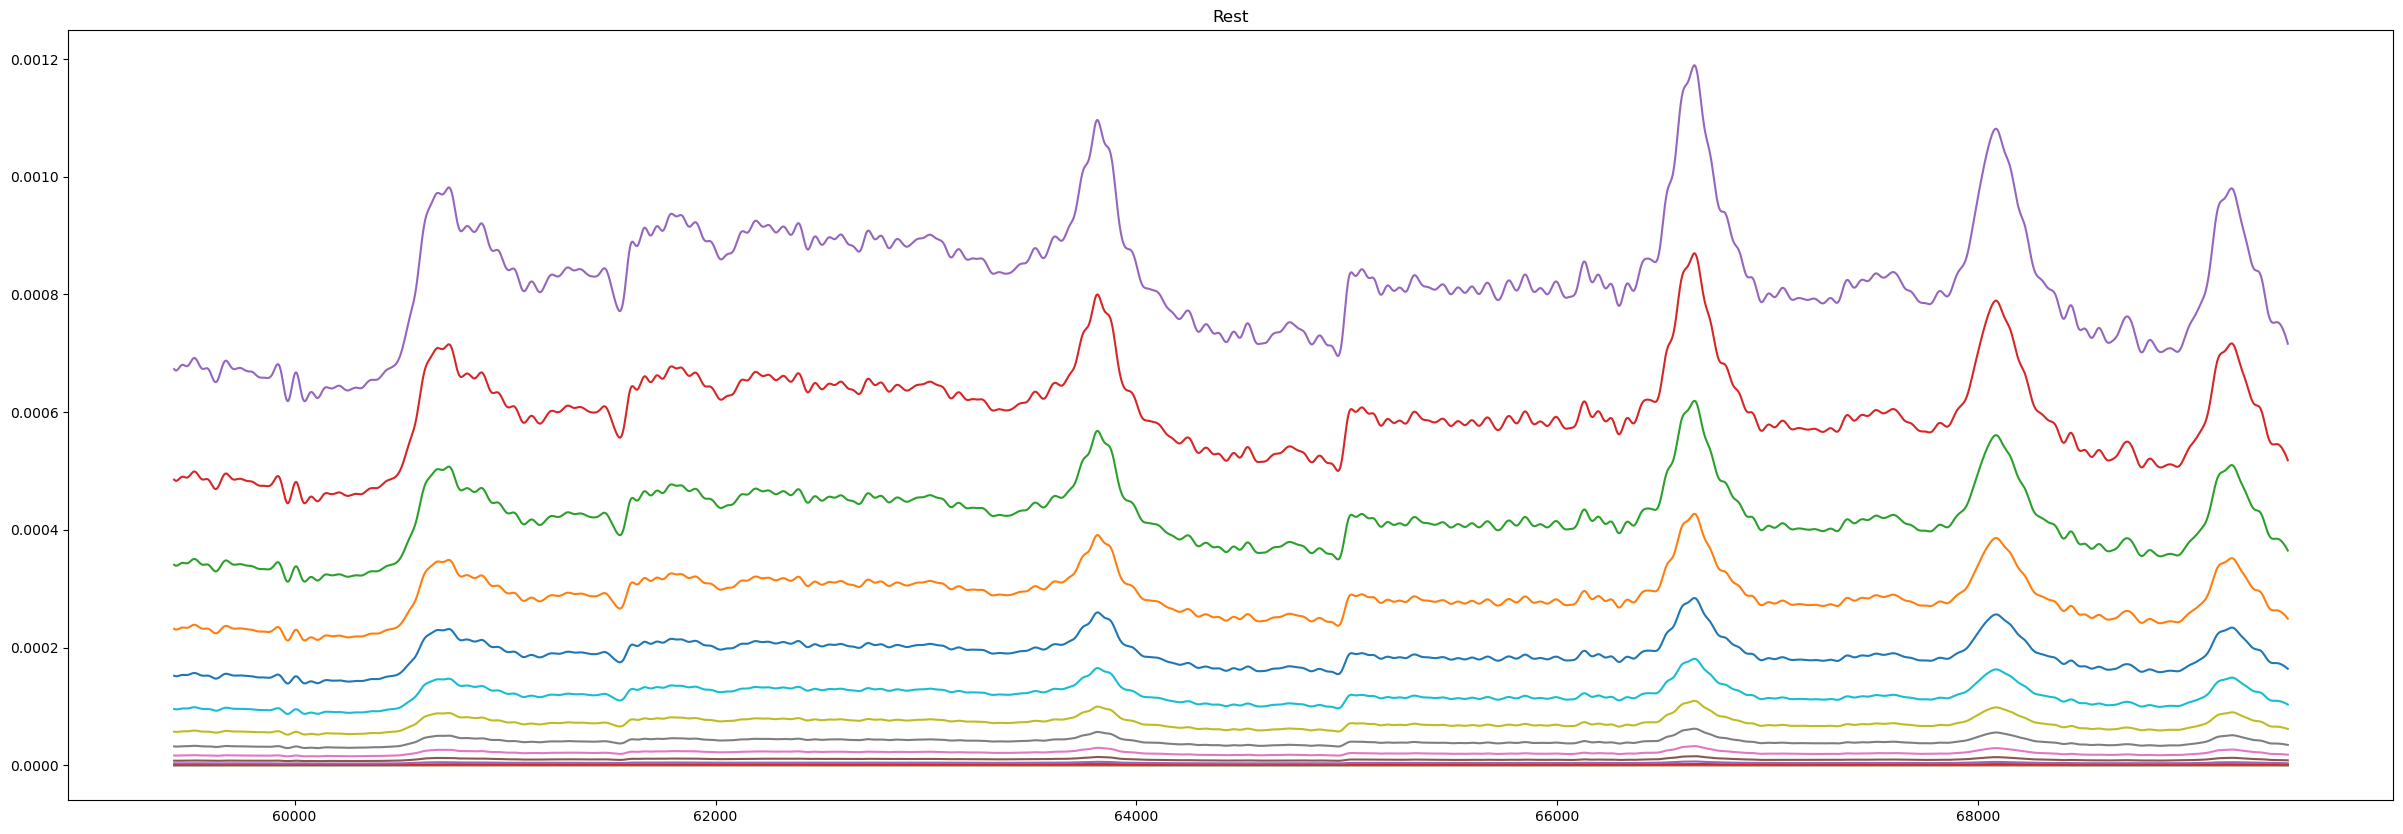

In [153]:
plt.plot(df.loc[ (df['Label']==6) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Rest")

Text(0.5, 1.0, 'Forward')

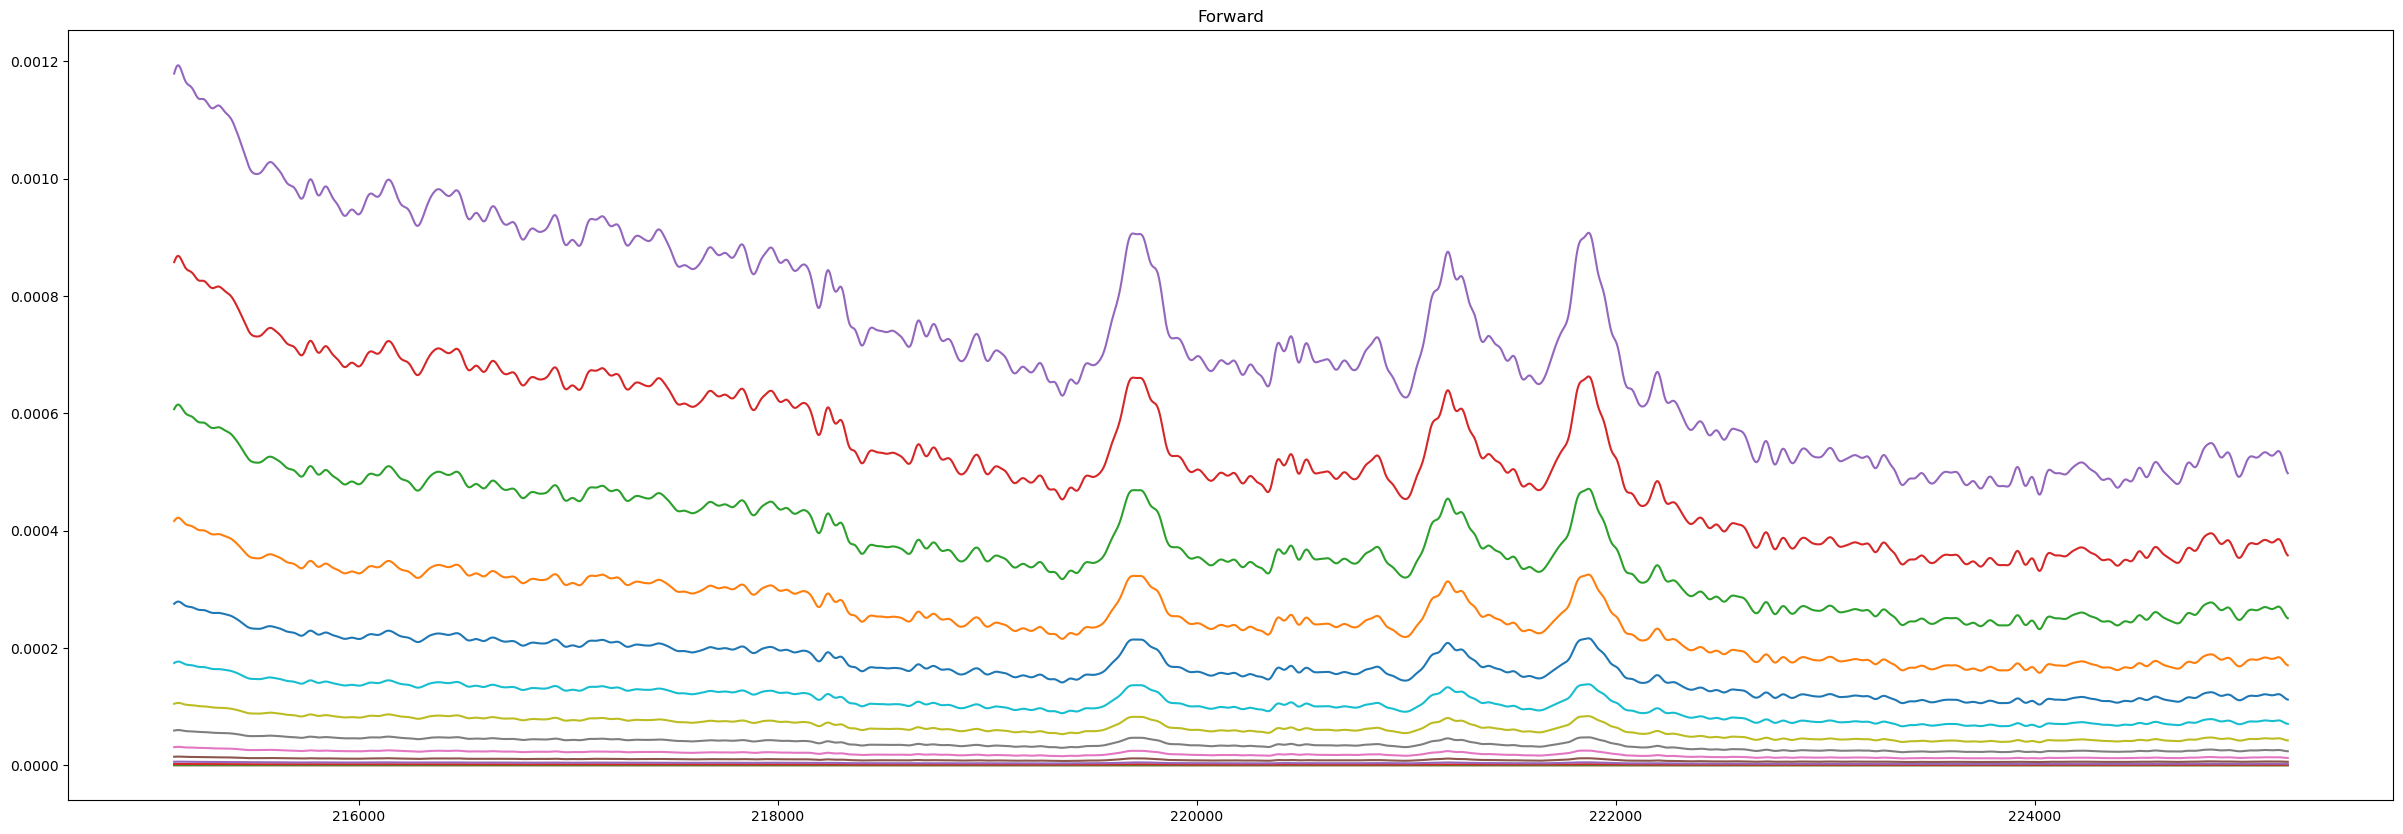

In [154]:
plt.plot(df.loc[ (df['Label']==0) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Forward")

Text(0.5, 1.0, 'Backward')

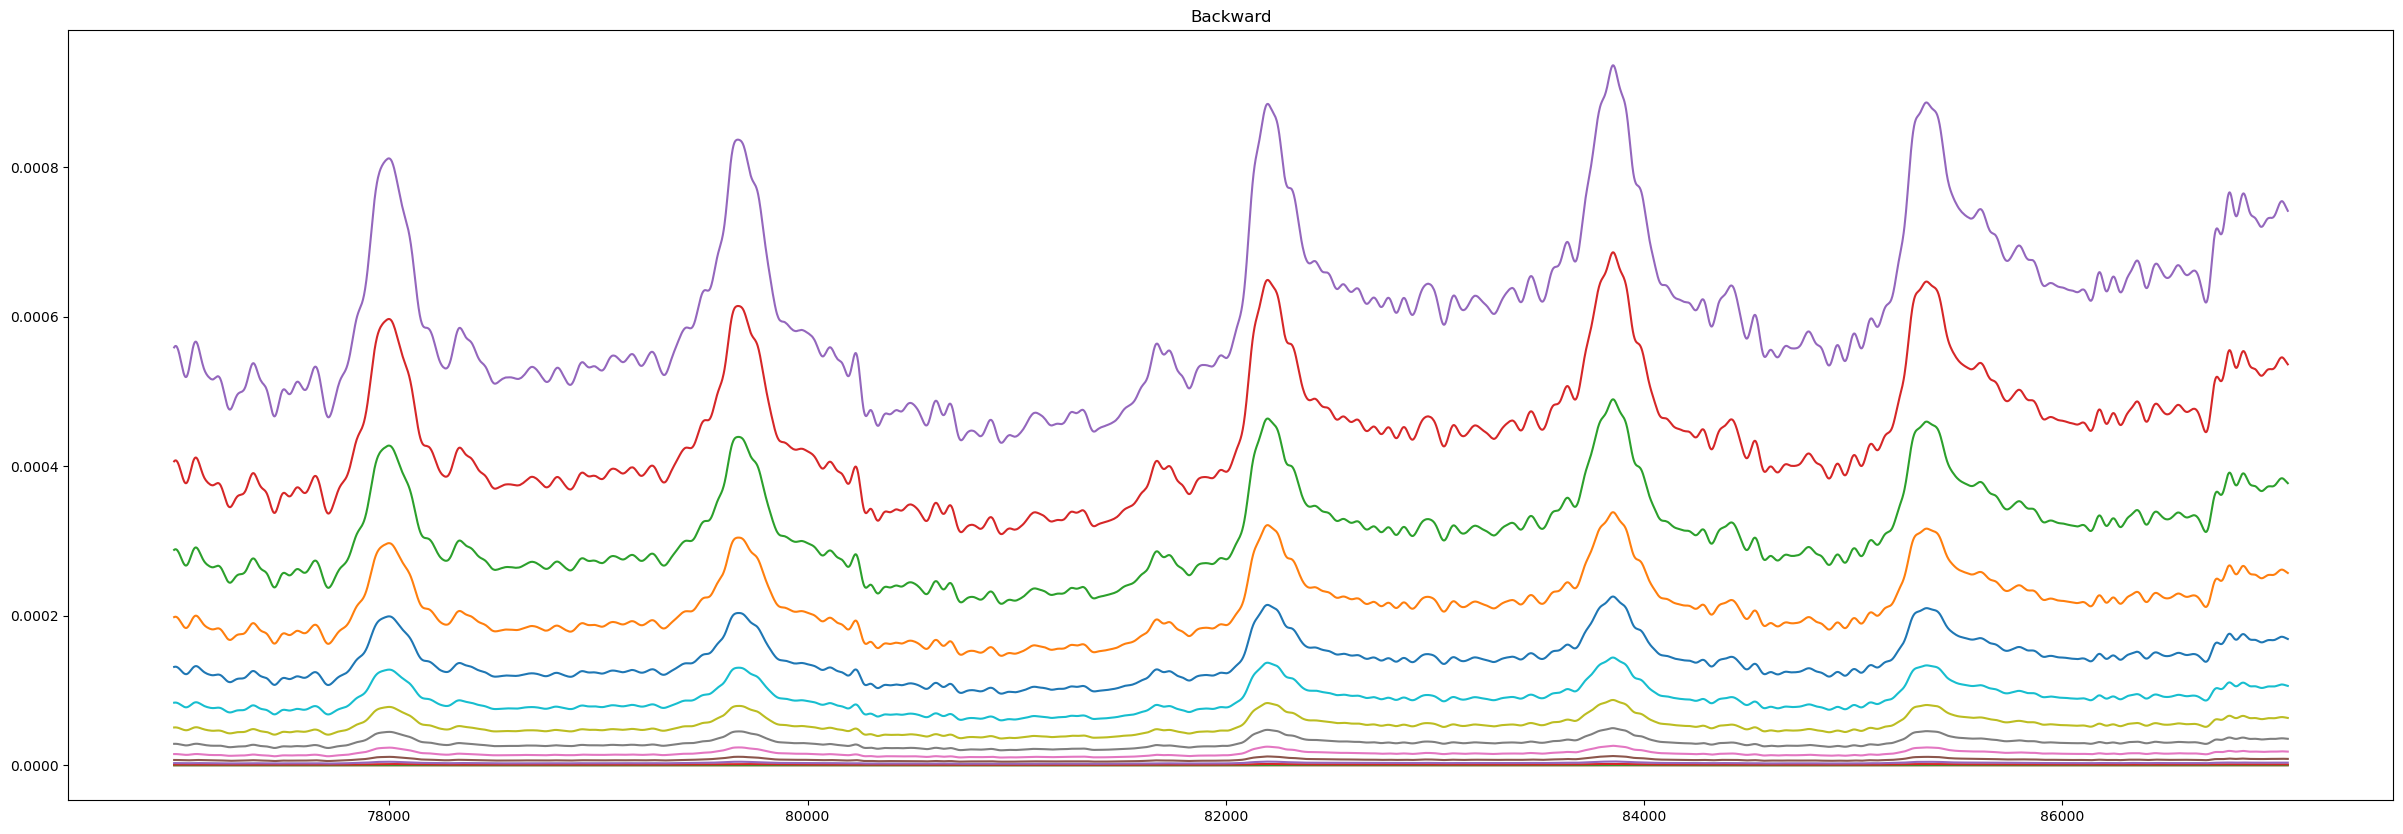

In [155]:
plt.plot(df.loc[ (df['Label']==1) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Backward")

Text(0.5, 1.0, 'Left')

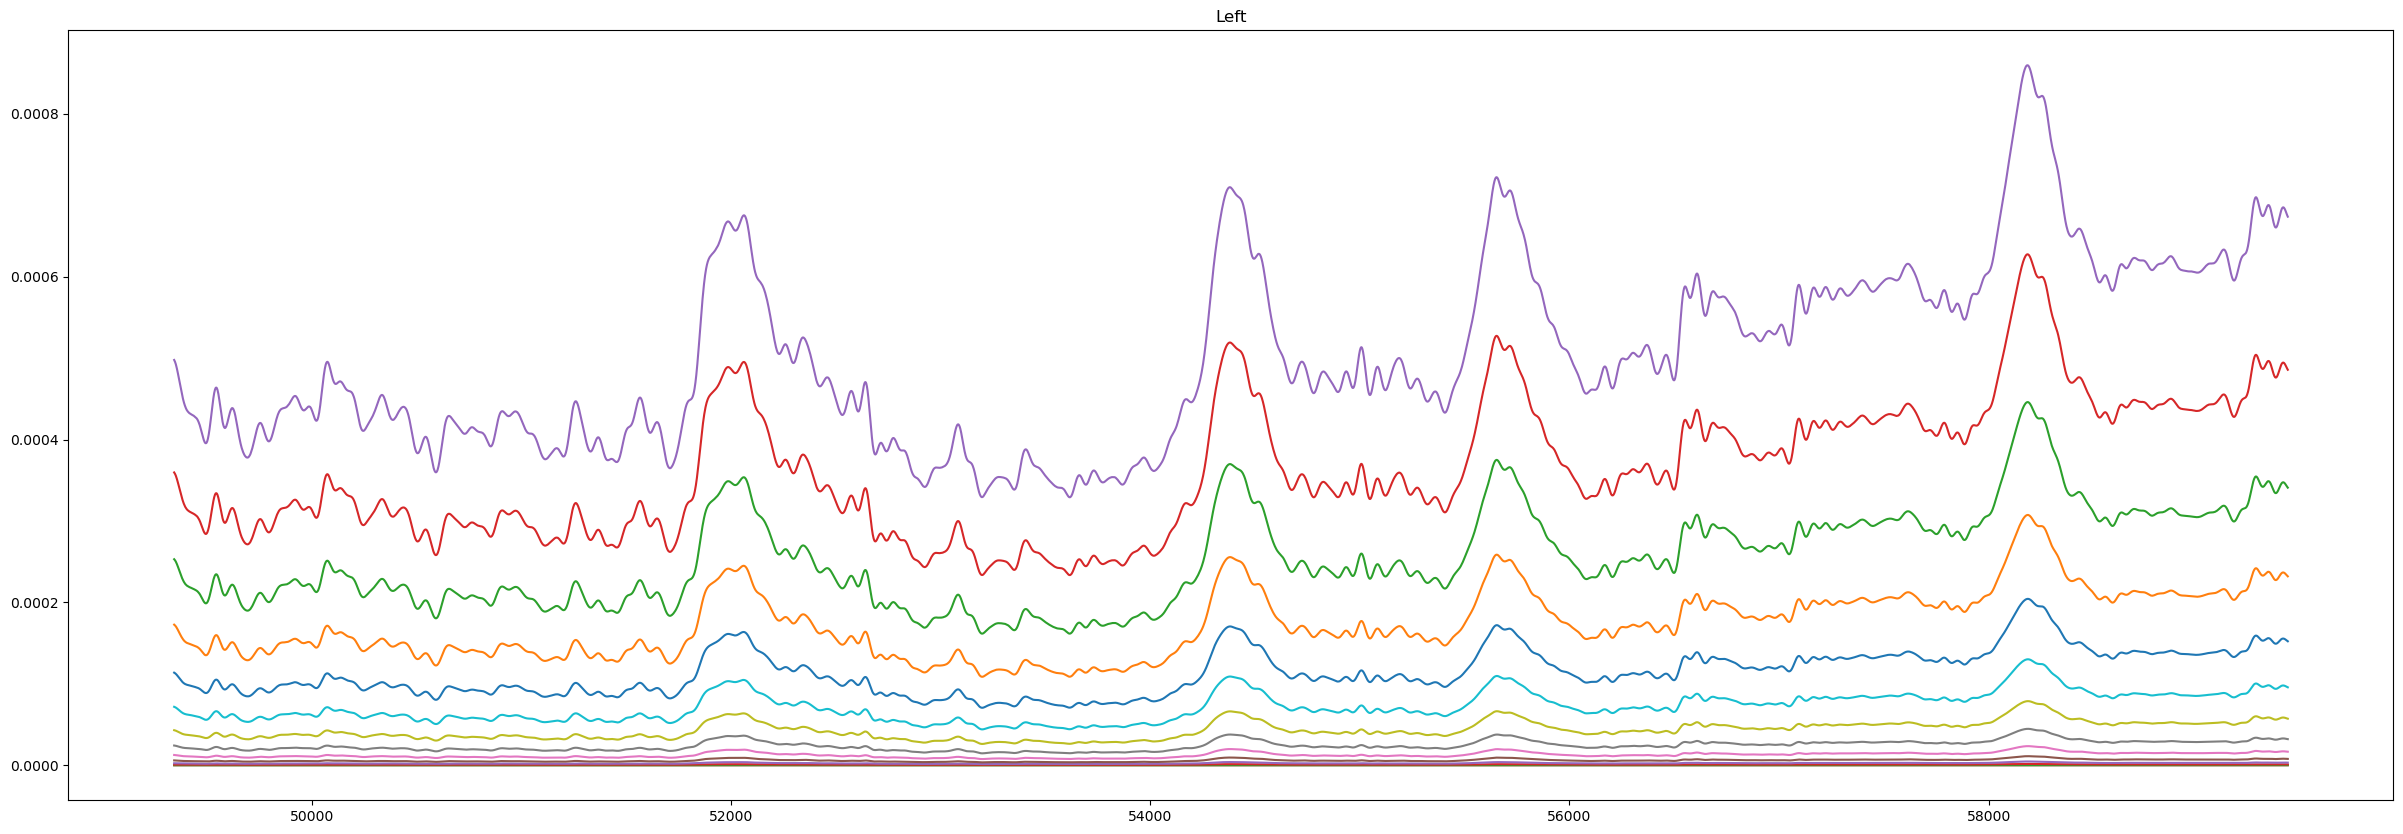

In [156]:
plt.plot(df.loc[ (df['Label']==2) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Left")

Text(0.5, 1.0, 'Right')

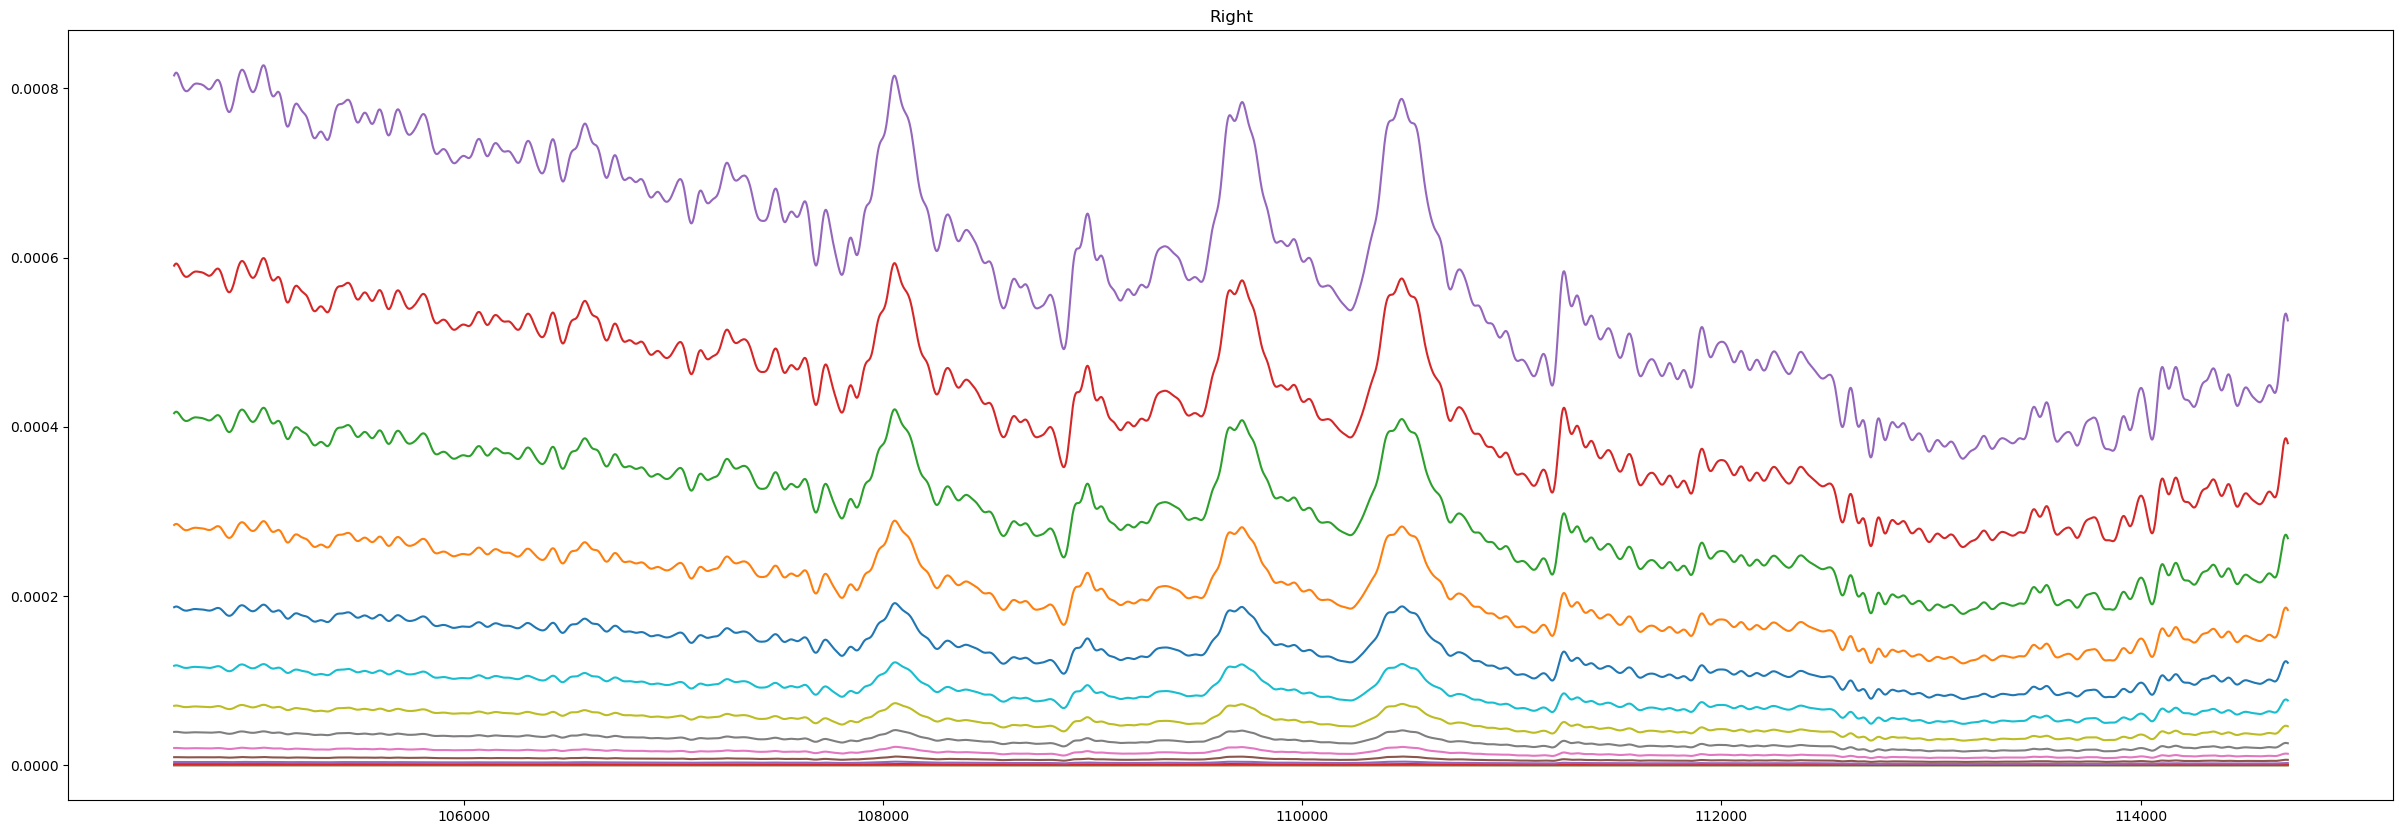

In [157]:
plt.plot(df.loc[ (df['Label']==3) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Right")

Text(0.5, 1.0, 'Up')

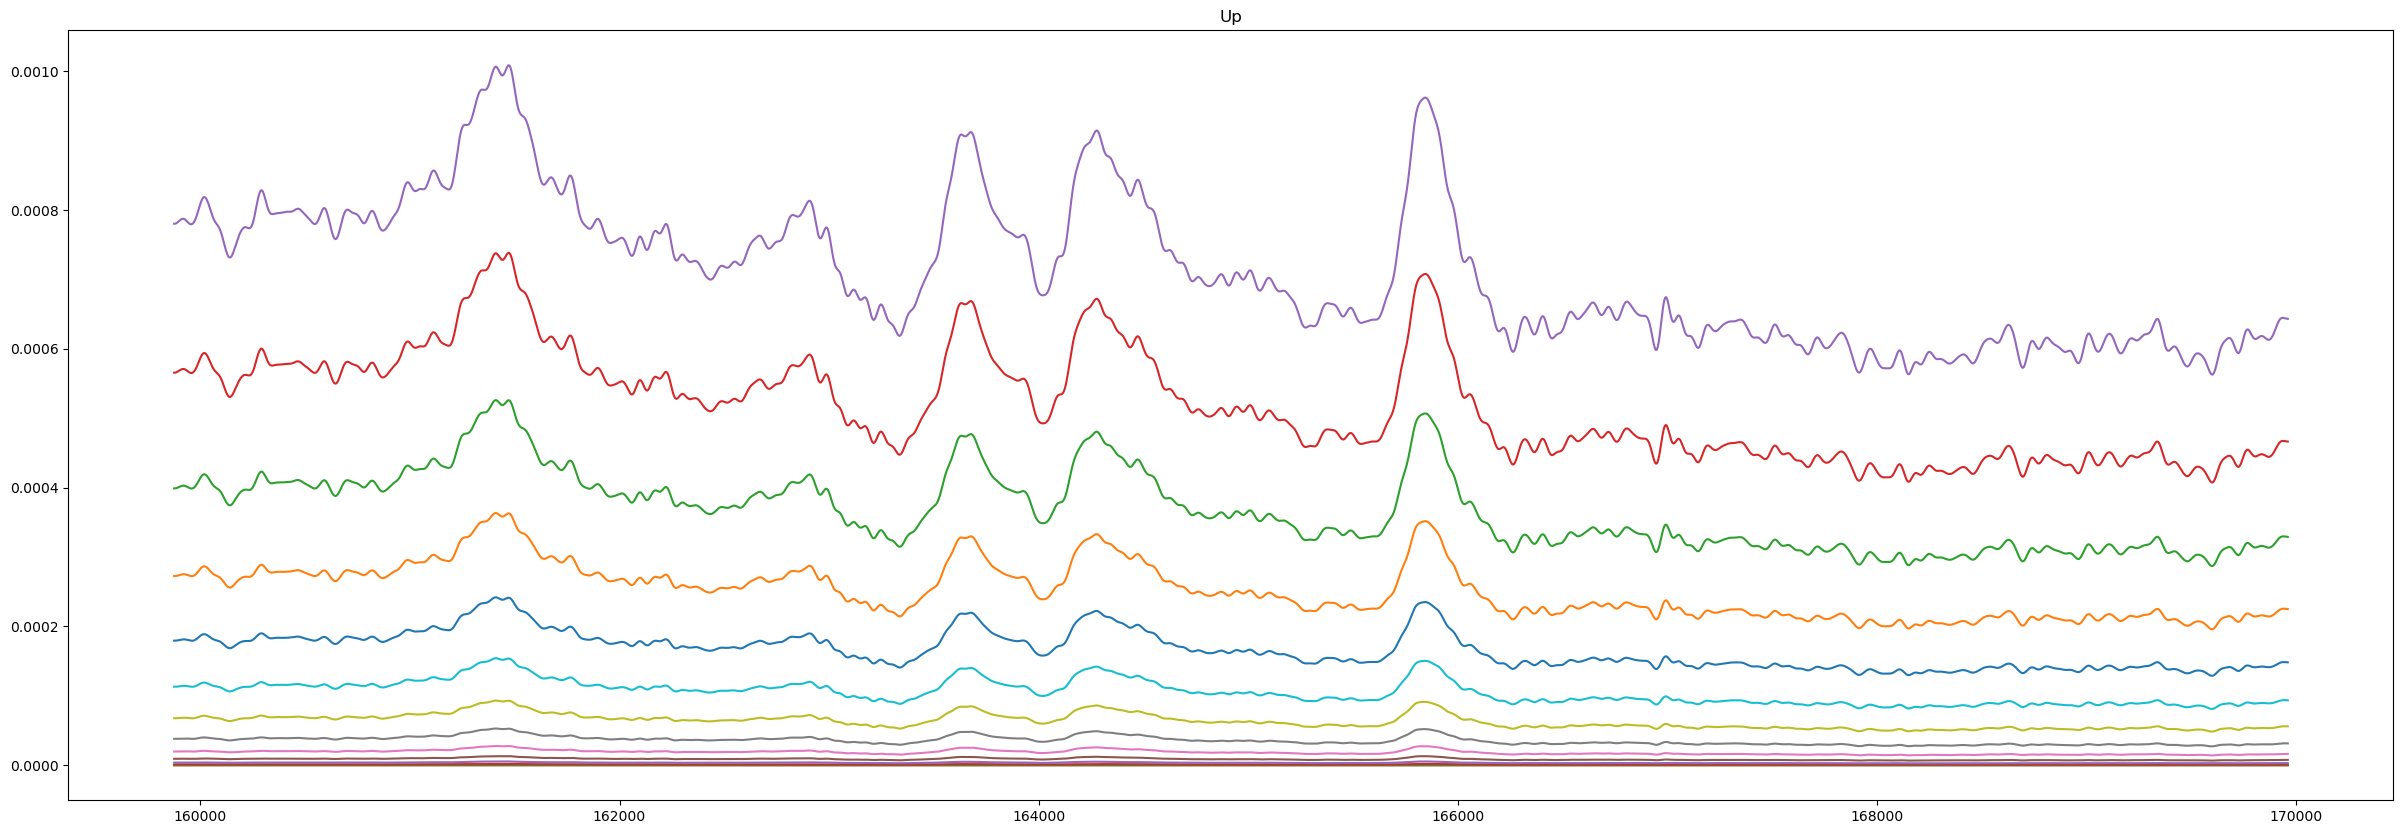

In [158]:
plt.plot(df.loc[ (df['Label']==4) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Up")

Text(0.5, 1.0, 'Down')

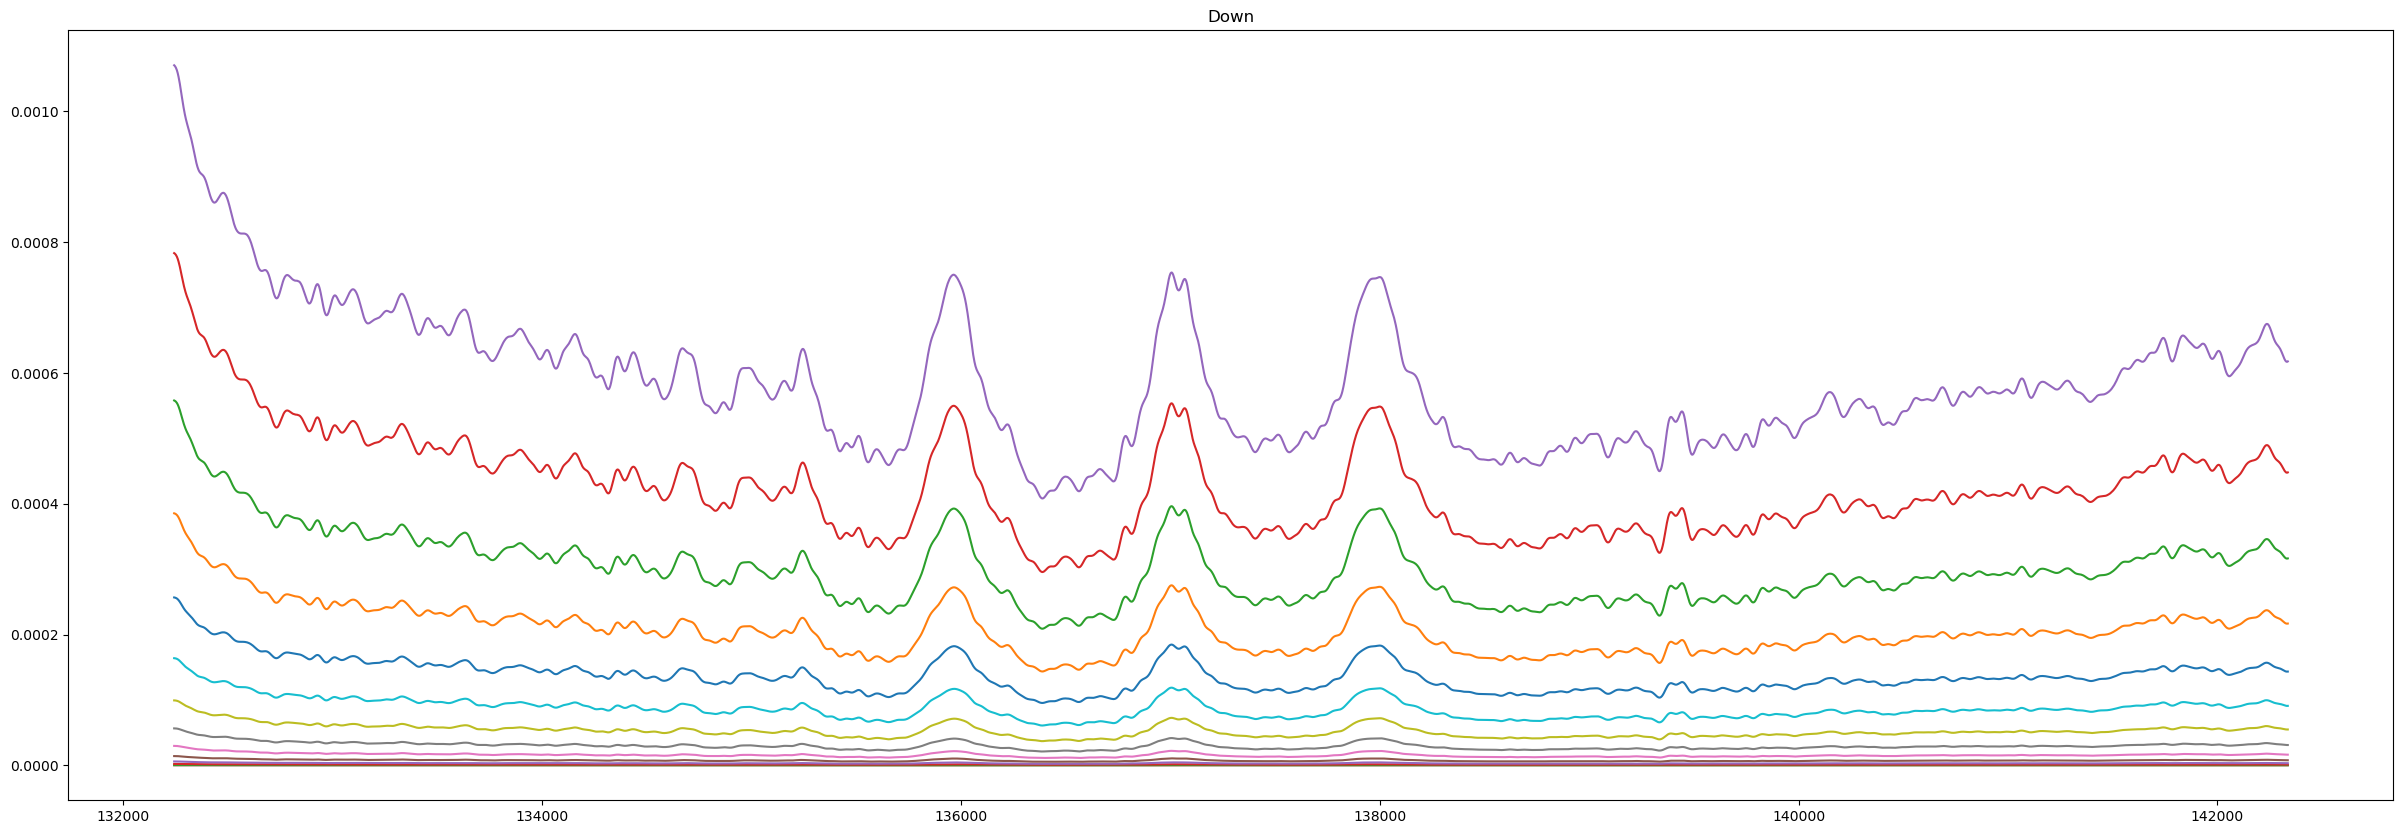

In [159]:
plt.plot(df.loc[ (df['Label']==5) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Down")

Text(0.5, 1.0, 'break')

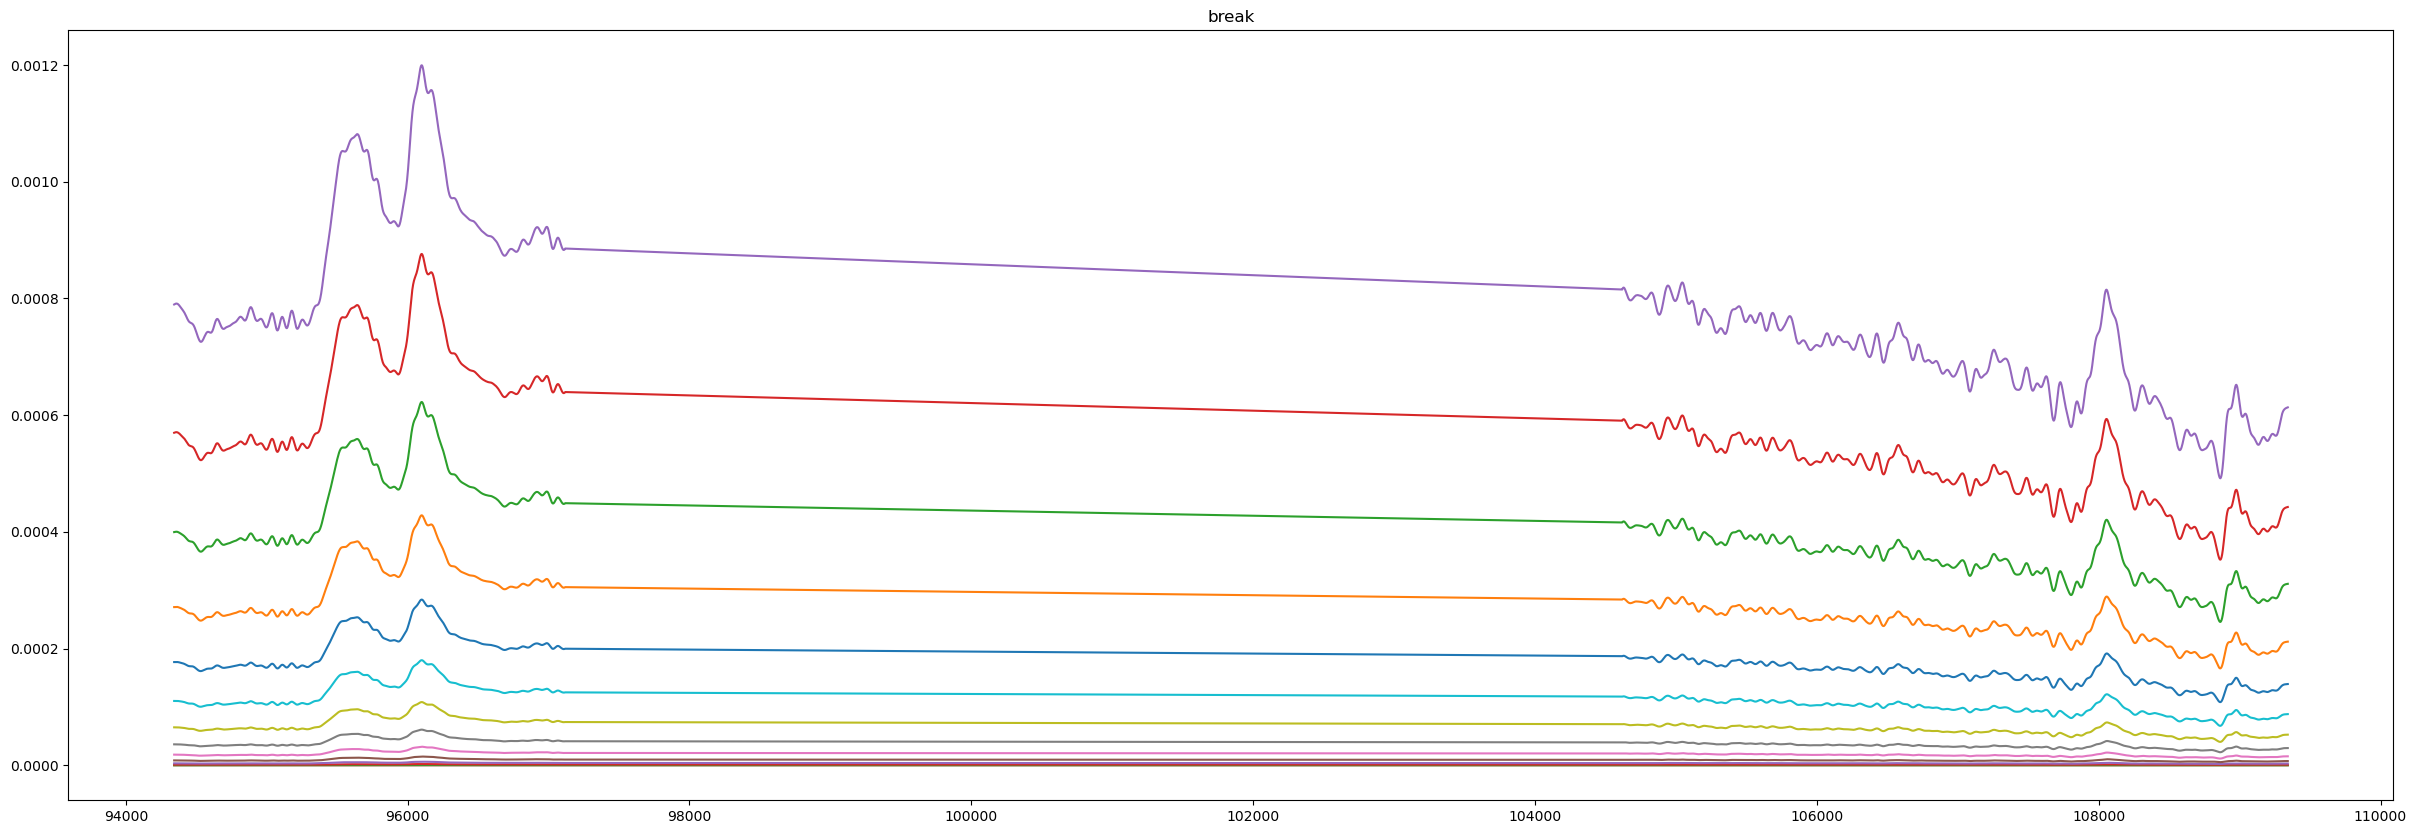

In [163]:
plt.plot(df.iloc[37500:45000,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("break")

### save the data into excel files

In [21]:
# df.to_csv('D:\EEG_ConvertedData\Arm_reaching_Session1_RM_train.csv',index=False)

In [22]:
# Xtrain=glob_train.iloc[:,0:15] 
# Ytrain=glob_train.iloc[:,-2:]
# Xtest=glob_test.iloc[:,0:15] 
# Ytest=glob_test.iloc[:,-2:]